# Pokémon Agent Tool Debugging Notebook

This notebook helps debug the tool calls used in the Pokémon Agent system. It allows testing each tool individually to verify functionality.

## Setup

First, we need to import the necessary modules.

In [1]:
import os
import sys
import json
import time
from IPython.display import Image, display
import anthropic

# Import our modules
from pokemon_emulator import GameEmulator
from pokemon_knowledge import KnowledgeBase
from pokemon_tools import PokemonTools

### Configure the ROM path and API key

In [2]:
# Path to your Pokémon ROM file
ROM_PATH = "roms/Pokemon Red Version (Colorization)/Pokemon Red Version (Colorization).gb"  # Update this

# Anthropic API key (optional, only needed if testing with Claude)
API_KEY = os.environ.get("ANTHROPIC_API_KEY", "")  # Will use env var or empty string

### Initialize components

In [3]:
# Initialize the emulator (set headless=False to see the game window)
emulator = GameEmulator(ROM_PATH, headless=False, speed=1, sound=False)

# Initialize the knowledge base with a test file
kb = KnowledgeBase(save_path="debug_knowledge.json")

# Initialize the tools
tools = PokemonTools(emulator, kb)

# Start the game (optional)
# emulator.start_game(skip_intro=True)

## Helper Functions

These functions make it easier to test and visualize results.

In [4]:
def display_current_screen():
    """Display the current game screen in the notebook."""
    screen = emulator.get_screen_pil()
    display(screen)
    
def print_game_state():
    """Print current game state."""
    state = emulator.get_game_state()
    formatted = emulator.format_game_state(state)
    print(formatted)
    return state

def execute_tool_and_show_result(tool_name, params):
    """Execute a tool and show the before/after state."""
    print("Before:")
    display_current_screen()
    print_game_state()
    
    print(f"\nExecuting {tool_name} with params: {params}")
    result = tools.execute_tool(tool_name, params)
    print(f"Result: {result}")
    
    print("\nAfter:")
    display_current_screen()
    print_game_state()
    
    return result

## Test Tool: press_button

Before:


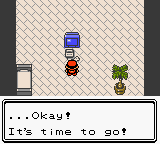

CURRENT GAME STATE:
Position: (3, 6) on Map 38
Direction: 4, Badges: 0
Pokémon Count: 0
Text is currently being displayed


Executing press_button with params: {'button': 'a', 'hold_frames': 10}
Result: Pressed a for 10 frames

After:


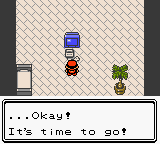

CURRENT GAME STATE:
Position: (3, 6) on Map 38
Direction: 4, Badges: 0
Pokémon Count: 0
Text is currently being displayed

Before:


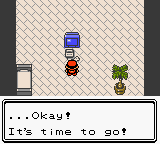

CURRENT GAME STATE:
Position: (3, 6) on Map 38
Direction: 4, Badges: 0
Pokémon Count: 0
Text is currently being displayed


Executing wait_frames with params: {'num_frames': 120}
Result: Waited for 120 frames

After:


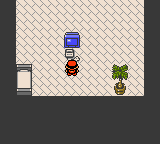

CURRENT GAME STATE:
Position: (3, 6) on Map 38
Direction: 4, Badges: 0
Pokémon Count: 0
Text is currently being displayed



'Waited for 120 frames'

In [140]:
# Test pressing the A button
execute_tool_and_show_result("press_button", {"button": "a", "hold_frames": 10})
# Wait to see result
execute_tool_and_show_result("wait_frames", {"num_frames": 120})

Before:


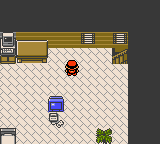

CURRENT GAME STATE:
Position: (4, 2) on Map 38
Direction: 4, Badges: 0
Pokémon Count: 0
Text is currently being displayed


Executing press_button with params: {'button': 'up', 'hold_frames': 2}
Result: Pressed up for 2 frames

After:


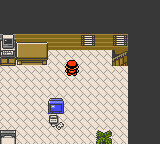

CURRENT GAME STATE:
Position: (4, 2) on Map 38
Direction: 4, Badges: 0
Pokémon Count: 0
Text is currently being displayed

Before:


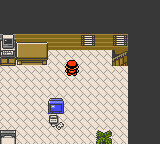

CURRENT GAME STATE:
Position: (4, 2) on Map 38
Direction: 4, Badges: 0
Pokémon Count: 0
Text is currently being displayed


Executing wait_frames with params: {'num_frames': 60}
Result: Waited for 60 frames

After:


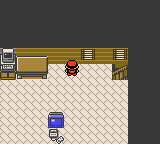

CURRENT GAME STATE:
Position: (4, 1) on Map 38
Direction: 4, Badges: 0
Pokémon Count: 0
Text is currently being displayed



'Waited for 60 frames'

In [175]:
# Test pressing the UP button
execute_tool_and_show_result("press_button", {"button": "up", "hold_frames": 2})
# Wait to see result
execute_tool_and_show_result("wait_frames", {"num_frames": 60})

Before:


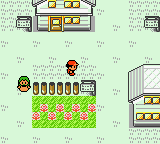

CURRENT GAME STATE:
Position: (6, 8) on Map 0
Direction: 0, Badges: 0
Pokémon Count: 0
Text is currently being displayed


Executing press_button with params: {'button': 'right', 'hold_frames': 10}
Result: Pressed right for 10 frames

After:


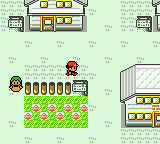

CURRENT GAME STATE:
Position: (6, 8) on Map 0
Direction: 0, Badges: 0
Pokémon Count: 0
Text is currently being displayed

Before:


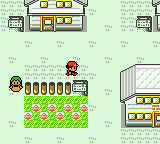

CURRENT GAME STATE:
Position: (6, 8) on Map 0
Direction: 0, Badges: 0
Pokémon Count: 0
Text is currently being displayed


Executing wait_frames with params: {'num_frames': 60}
Result: Waited for 60 frames

After:


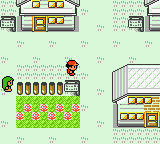

CURRENT GAME STATE:
Position: (7, 8) on Map 0
Direction: 0, Badges: 0
Pokémon Count: 0
Text is currently being displayed



'Waited for 60 frames'

In [195]:
# Test pressing the RIGHT button
execute_tool_and_show_result("press_button", {"button": "right", "hold_frames": 10})
# Wait to see result
execute_tool_and_show_result("wait_frames", {"num_frames": 60})

Before:


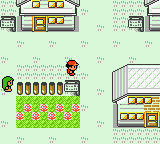

CURRENT GAME STATE:
Position: (7, 8) on Map 0
Direction: 0, Badges: 0
Pokémon Count: 0
Text is currently being displayed


Executing press_button with params: {'button': 'left', 'hold_frames': 10}
Result: Pressed left for 10 frames

After:


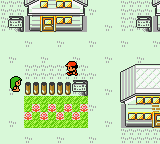

CURRENT GAME STATE:
Position: (7, 8) on Map 0
Direction: 0, Badges: 0
Pokémon Count: 0
Text is currently being displayed

Before:


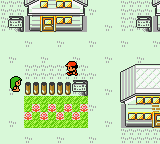

CURRENT GAME STATE:
Position: (7, 8) on Map 0
Direction: 0, Badges: 0
Pokémon Count: 0
Text is currently being displayed


Executing wait_frames with params: {'num_frames': 60}
Result: Waited for 60 frames

After:


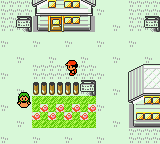

CURRENT GAME STATE:
Position: (6, 8) on Map 0
Direction: 0, Badges: 0
Pokémon Count: 0
Text is currently being displayed



'Waited for 60 frames'

In [196]:
# Test pressing the RIGHT button
execute_tool_and_show_result("press_button", {"button": "left", "hold_frames": 10})
# Wait to see result
execute_tool_and_show_result("wait_frames", {"num_frames": 60})

Before:


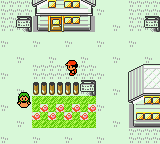

CURRENT GAME STATE:
Position: (6, 8) on Map 0
Direction: 0, Badges: 0
Pokémon Count: 0
Text is currently being displayed


Executing press_button with params: {'button': 'down', 'hold_frames': 10}
Result: Pressed down for 10 frames

After:


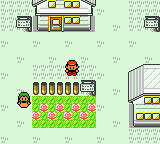

CURRENT GAME STATE:
Position: (6, 8) on Map 0
Direction: 0, Badges: 0
Pokémon Count: 0
Text is currently being displayed

Before:


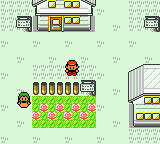

CURRENT GAME STATE:
Position: (6, 8) on Map 0
Direction: 0, Badges: 0
Pokémon Count: 0
Text is currently being displayed


Executing wait_frames with params: {'num_frames': 60}
Result: Waited for 60 frames

After:


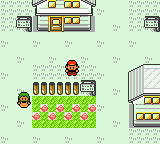

CURRENT GAME STATE:
Position: (6, 8) on Map 0
Direction: 0, Badges: 0
Pokémon Count: 0
Text is currently being displayed



'Waited for 60 frames'

In [197]:
# Test pressing the DOWN button
execute_tool_and_show_result("press_button", {"button": "down", "hold_frames": 10})
# Wait to see result
execute_tool_and_show_result("wait_frames", {"num_frames": 60})

Before:


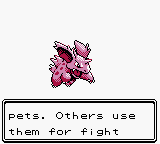

CURRENT GAME STATE:
Position: (3, 6) on Map 38
Direction: 4, Badges: 0
Pokémon Count: 0


Executing press_button with params: {'button': 'start', 'hold_frames': 20}
Result: Pressed start for 20 frames

After:


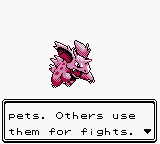

CURRENT GAME STATE:
Position: (3, 6) on Map 38
Direction: 4, Badges: 0
Pokémon Count: 0



'Pressed start for 20 frames'

In [ ]:
# Test pressing the start button
execute_tool_and_show_result("press_button", {"button": "start", "hold_frames": 20})

## Test Tool: wait_frames

Before:


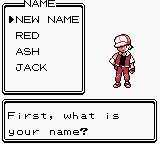

CURRENT GAME STATE:
Position: (3, 6) on Map 38
Direction: 4, Badges: 0
Pokémon Count: 0


Executing wait_frames with params: {'num_frames': 60}
Result: Waited for 60 frames

After:


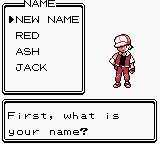

CURRENT GAME STATE:
Position: (3, 6) on Map 38
Direction: 4, Badges: 0
Pokémon Count: 0



'Waited for 60 frames'

In [113]:
# Test waiting for frames
execute_tool_and_show_result("wait_frames", {"num_frames": 60})

## Test Tool: update_knowledge

In [141]:
# Test updating the knowledge base
result = tools.execute_tool("update_knowledge", {
    "section": "game_state", 
    "key": "current_location", 
    "value": "Pallet Town"
})
print(f"Result: {result}")

# Verify the update
stored_value = kb.get("game_state", "current_location")
print(f"Stored value: {stored_value}")

Result: Updated knowledge base: game_state.current_location = Pallet Town
Stored value: Pallet Town


## Test Tool: get_game_info

In [143]:
# Test getting player position
result = tools.execute_tool("get_game_info", {"info_type": "player_position"})
print(f"Result: {result}")

Result: Player position: (3, 6)


In [144]:
# Test getting battle status
result = tools.execute_tool("get_game_info", {"info_type": "battle_status"})
print(f"Result: {result}")

Result: In battle: False, Text active: True


## Test Action Sequence

Test a sequence of actions to simulate what Claude might do.

In [146]:
def run_action_sequence(actions):
    """Run a sequence of actions and show results."""
    print("Initial state:")
    display_current_screen()
    print_game_state()
    
    for i, (tool_name, params) in enumerate(actions, 1):
        print(f"\nStep {i}: Executing {tool_name} with params: {params}")
        result = tools.execute_tool(tool_name, params)
        print(f"Result: {result}")
        display_current_screen()
    
    print("\nFinal state:")
    print_game_state()

Initial state:


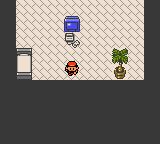

CURRENT GAME STATE:
Position: (3, 7) on Map 38
Direction: 4, Badges: 0
Pokémon Count: 0
Text is currently being displayed


Step 1: Executing press_button with params: {'button': 'a', 'hold_frames': 10}
Result: Pressed a for 10 frames


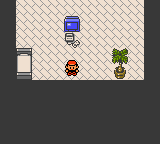


Step 2: Executing wait_frames with params: {'num_frames': 30}
Result: Waited for 30 frames


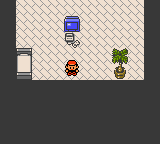


Step 3: Executing press_button with params: {'button': 'a', 'hold_frames': 10}
Result: Pressed a for 10 frames


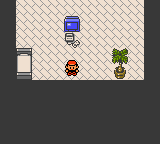


Step 4: Executing press_button with params: {'button': 'down', 'hold_frames': 15}
Result: Pressed down for 15 frames


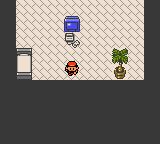


Step 5: Executing update_knowledge with params: {'section': 'player_progress', 'key': 'talked_to_npc', 'value': 'true'}
Result: Updated knowledge base: player_progress.talked_to_npc = true


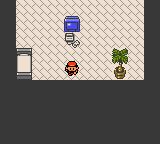


Final state:
CURRENT GAME STATE:
Position: (3, 7) on Map 38
Direction: 4, Badges: 0
Pokémon Count: 0
Text is currently being displayed



In [152]:
# Example sequence to navigate and interact
actions = [
    ("press_button", {"button": "a", "hold_frames": 10}),  # Talk/Interact
    ("wait_frames", {"num_frames": 30}),                     # Wait for text
    ("press_button", {"button": "a", "hold_frames": 10}),  # Advance text
    ("press_button", {"button": "down", "hold_frames": 15}), # Move down
    ("update_knowledge", {"section": "player_progress", "key": "talked_to_npc", "value": "true"})
]

run_action_sequence(actions)

## Test Tool Definitions (for Claude API)

Let's inspect the tool definitions that would be sent to Claude.

In [198]:
tool_definitions = tools.define_tools()
print(json.dumps(tool_definitions, indent=2))

[
  {
    "name": "press_button",
    "description": "Press a button on the Game Boy",
    "input_schema": {
      "type": "object",
      "properties": {
        "button": {
          "type": "string",
          "enum": [
            "up",
            "down",
            "left",
            "right",
            "a",
            "b",
            "start",
            "select"
          ],
          "description": "The button to press"
        },
        "hold_frames": {
          "type": "integer",
          "description": "Number of frames to hold the button",
          "default": 10
        }
      },
      "required": [
        "button"
      ]
    }
  },
  {
    "name": "wait_frames",
    "description": "Wait for a specified number of frames without taking any action",
    "input_schema": {
      "type": "object",
      "properties": {
        "num_frames": {
          "type": "integer",
          "description": "Number of frames to wait",
          "default": 30
        }
      },


## Test with Claude API (Optional)

This section tests sending tool definitions to Claude and processing responses.

In [199]:
def call_claude_with_tool(api_key, game_state, screen_base64, tools_list):
    """Call Claude API with tools and game state."""
    if not api_key:
        print("No API key provided. Skipping Claude API call.")
        return None
        
    client = anthropic.Anthropic(api_key=api_key)
    
    # Format game state
    state_text = emulator.format_game_state(game_state)
    
    # Build message
    message = {
        "role": "user",
        "content": [
            {
                "type": "image",
                "source": {
                    "type": "base64",
                    "media_type": "image/png",
                    "data": screen_base64
                }
            },
            {
                "type": "text",
                "text": f"""Current game state:\n{state_text}\n\nAnalyze the current situation and decide what action to take. Use one of the available tools."""
            }
        ]
    }
    
    # System prompt
    system_prompt = """
You are an expert Pokémon player. Analyze the game state and use a tool to take the best action.
First, think step-by-step about the current situation, then use a tool to execute the appropriate action.
Always use a tool - do not just describe what to do.
"""
    
    # Make API call
    try:
        response = client.messages.create(
            model="claude-3-7-sonnet-20250219",
            system=system_prompt,
            messages=[message],
            max_tokens=2000,
            temperature=1.0,
            tools=tools_list
        )
        return response
    except Exception as e:
        print(f"Error calling Claude API: {e}")
        return None

Current game state:


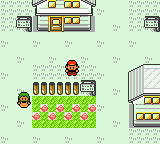

CURRENT GAME STATE:
Position: (6, 8) on Map 0
Direction: 0, Badges: 0
Pokémon Count: 0
Text is currently being displayed


Calling Claude API...

Claude's response:
# Game State Analysis

I can see that we're playing Pokémon (appears to be an early-generation game like Red/Blue/Yellow) and the player character is standing in what looks like a town. The player is positioned at coordinates (6, 8) on Map 0, facing direction 0 (likely north/up), and has 0 badges and 0 Pokémon currently.

The screen shows:
- The player character in what appears to be a small town
- A house with a yellow roof in the upper part of the screen
- Some buildings visible on the screen edges
- A patch of flowers/grass with fencing around it
- Text is currently being displayed, though I can't see what it says

Since text is currently being displayed, the most appropriate action would be to advance the text by pressing the A button. This will allow us to continue reading any important information or move on with the 

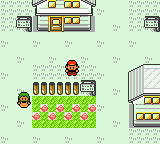

CURRENT GAME STATE:
Position: (6, 8) on Map 0
Direction: 0, Badges: 0
Pokémon Count: 0
Text is currently being displayed



In [200]:
# Get current state
game_state = emulator.get_game_state()
screen_base64 = emulator.get_screen_base64()

# Get tool definitions
tool_defs = tools.define_tools()

# Call Claude if API key is available
if API_KEY:
    # Display current screen
    print("Current game state:")
    display_current_screen()
    print_game_state()
    
    # Call Claude
    print("\nCalling Claude API...")
    response = call_claude_with_tool(API_KEY, game_state, screen_base64, tool_defs)
    
    if response:
        # Print Claude's response
        print("\nClaude's response:")
        for content in response.content:
            if content.type == "text":
                print(content.text)
            elif content.type == "tool_use":
                print(f"\n[Using tool: {content.name}]")
                print(f"Parameters: {content.input}")
                
                # Execute the tool
                print("\nExecuting tool...")
                result = tools.execute_tool(content.name, content.input)
                print(f"Result: {result}")
                
        # Show updated state
        print("\nUpdated state:")
        display_current_screen()
        print_game_state()
else:
    print("No API key provided. Skipping Claude API test.")

## Cleanup

Make sure to close the emulator when you're done testing.

In [ ]:
# Clean up resources
emulator.close()
print("Emulator closed.")